# Business Understanding

**Problem Statement**

Perkembangan industri telekomunikasi sekarang sangat cepat. Hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi.
Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya *internet service provider* yang dapat menimbulkan persaingan antar provider.

Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

**Tujuan Analisis**

Melakukan analisis klasifikasi data customer untuk memprediksi peluang customer yang akan beralih ke provider lain (churn) dengan memanfaatkan data histori yang berhubungan dengan perilaku customer.


# Data Understanding

## Deskripsi Data

> Dataset yang digunakan adalah 2 yaitu data training dan data testing. Data training terdiri 4250 sampel. Setiap sampel terdiri 19 features dan 1 variabel boolean "churn" sebagai variabel target. Data testing memiliki feature yang sama dengan data training namun tidak memiliki variabel target dan hanya terdiri 750 sampel. Adapun deskripsi feature tersebut yaitu:


>*   "state", string. Kode 2 huruf negara bagian USA sebagai alamat customer
*   "account_length", Jumlah bulan pemakaian provider telekomunikasi
*   "area_code", string="area_code_AAA" dimana AAA = 3 digit area code.
*   "international_plan", (yes/no). Customer memiliki international plan.
*   "voice_mail_plan", (yes/no). Customer memiliki voice mail plan.
*   "number_vmail_messages", numerical. Jumlah pesan voice-mail.
*   "total_day_minutes", numerical. Total durasi ( menit) telepon siang hari.
*   "total_day_calls", numerical. Jumlah panggilan siang hari
*   "total_day_charge", numerical. Total biaya penelponan siang hari
*   "total_eve_minutes", numerical. Total durasi ( menit) telepon sore hari.
*   "total_eve_calls", numerical. Jumlah total panggilan sore hari
*   "total_eve_charge", numerical. Total biaya penelponan siang hari
*   "total_night_minutes", numerical. Total durasi ( menit) telepon malam hari.
*   "total_night_calls", numerical. Jumlah total panggilan malam hari
*   "total_night_charge", numerical. Total biaya penelponan malam hari
*   "total_intl_minutes", numerical. Total durasi ( menit) panggilan internasional.
*   "total_intl_calls", numerical. Jumlah total panggilan internasional
*   "total_intl_charge", numerical. Total biaya panggailan internasional
*   "number_customer_service_calls", numerical. jumlah panggilan ke customer service
*   "churn", (yes/no). Customer churn - target variable.




## Import Library dan Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Data Training

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
df_train = pd.read_csv("Data Train.csv")

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


**Cek Tipe Data dan Kolom**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f


Dari informasi di atas dapat dilihat:
*   Ukuran data adalah (4250, 20)
*   Seluruh variabel (kolom) tidak memiliki missing value
*   Terdapat 5 variabel yang bertipe kategori, dan 15 numerik




In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
df_train.describe(include='O').T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


### Data Testing

In [ ]:
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
df_test = pd.read_csv('Data Test.csv')
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# membuang kolom id karena merupakan index dan tidak memiliki arti
df_test = df_test.drop('id', axis=1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    object 
 4   voice_mail_plan                750 non-null    object 
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

Dari informasi di atas dapat dilihat:
*   Ukuran data testing adalah (750, 19)
*   Seluruh variabel (kolom) tidak memiliki missing value
*   Terdapat 4 variabel yang bertipe kategori, dan 15 numerik

## Exploratory Data Analysis

Pada exploratory data analisis, analisis hanya dilakukan pada data training

### Data Categorical

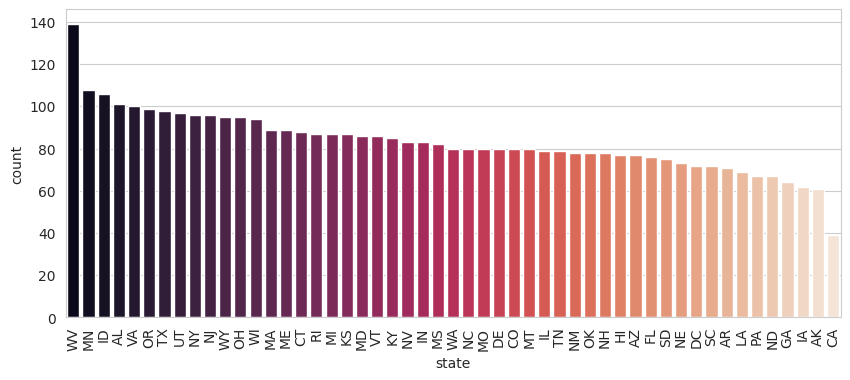

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='state',order=df_train['state'].value_counts(ascending=False).index, palette='rocket')
plt.xticks(rotation=90);

Dari distribusi customer provider berdasarkan State diketahui bahwa State WV memiliki customer paling banyak, sedangkan CA adalah State yang paling sedikit memiliki customer

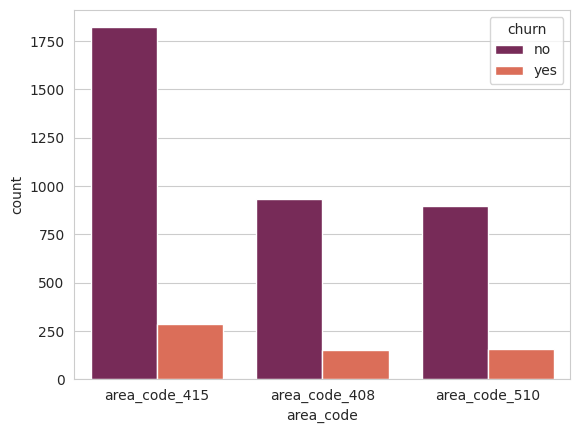

In [ ]:
sns.countplot(data=df_train, x='area_code', hue='churn', palette='rocket');

Hampir separuh customer provider tinggal di area code 415

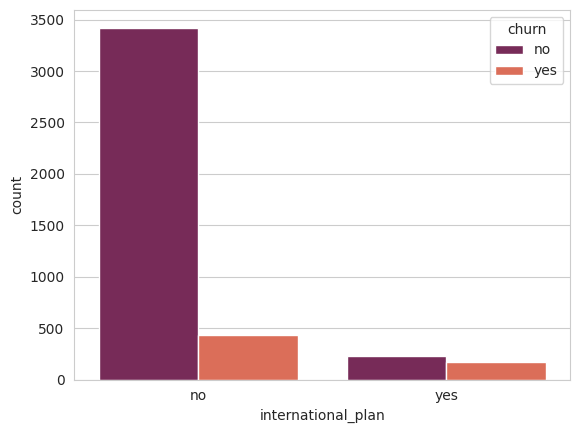

In [ ]:
sns.countplot(data=df_train, x='international_plan', hue='churn', palette='rocket');

Sebagian besar customer tidak memiliki international plan. Namun jika dilihat dari status customer, customer yang beralih dari provider ini (churn) hampir separuhnya memiliki international plan.

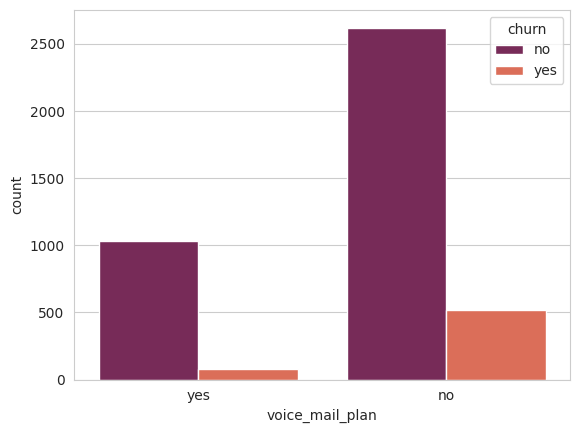

In [ ]:
sns.countplot(data=df_train, x='voice_mail_plan', hue='churn', palette='rocket');

Sebagian besar customer tidak memiliki voice mail plan

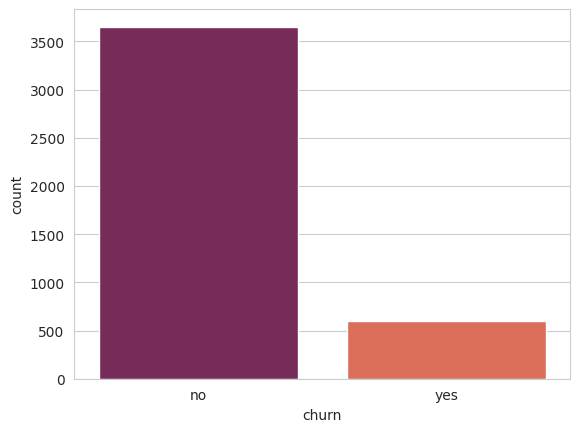

In [ ]:
sns.countplot(data=df_train, x='churn', palette='rocket');

Pada variable target, class customer yang tidak churn jauh lebih banyak dibandingkan dengan customer yang churn. Karena ketimpangan ini, maka data ini disebut data imbalance.

### Data Numerical

In [ ]:
import matplotlib

In [ ]:
num_cols = df_train.select_dtypes(include=['int','float']).columns

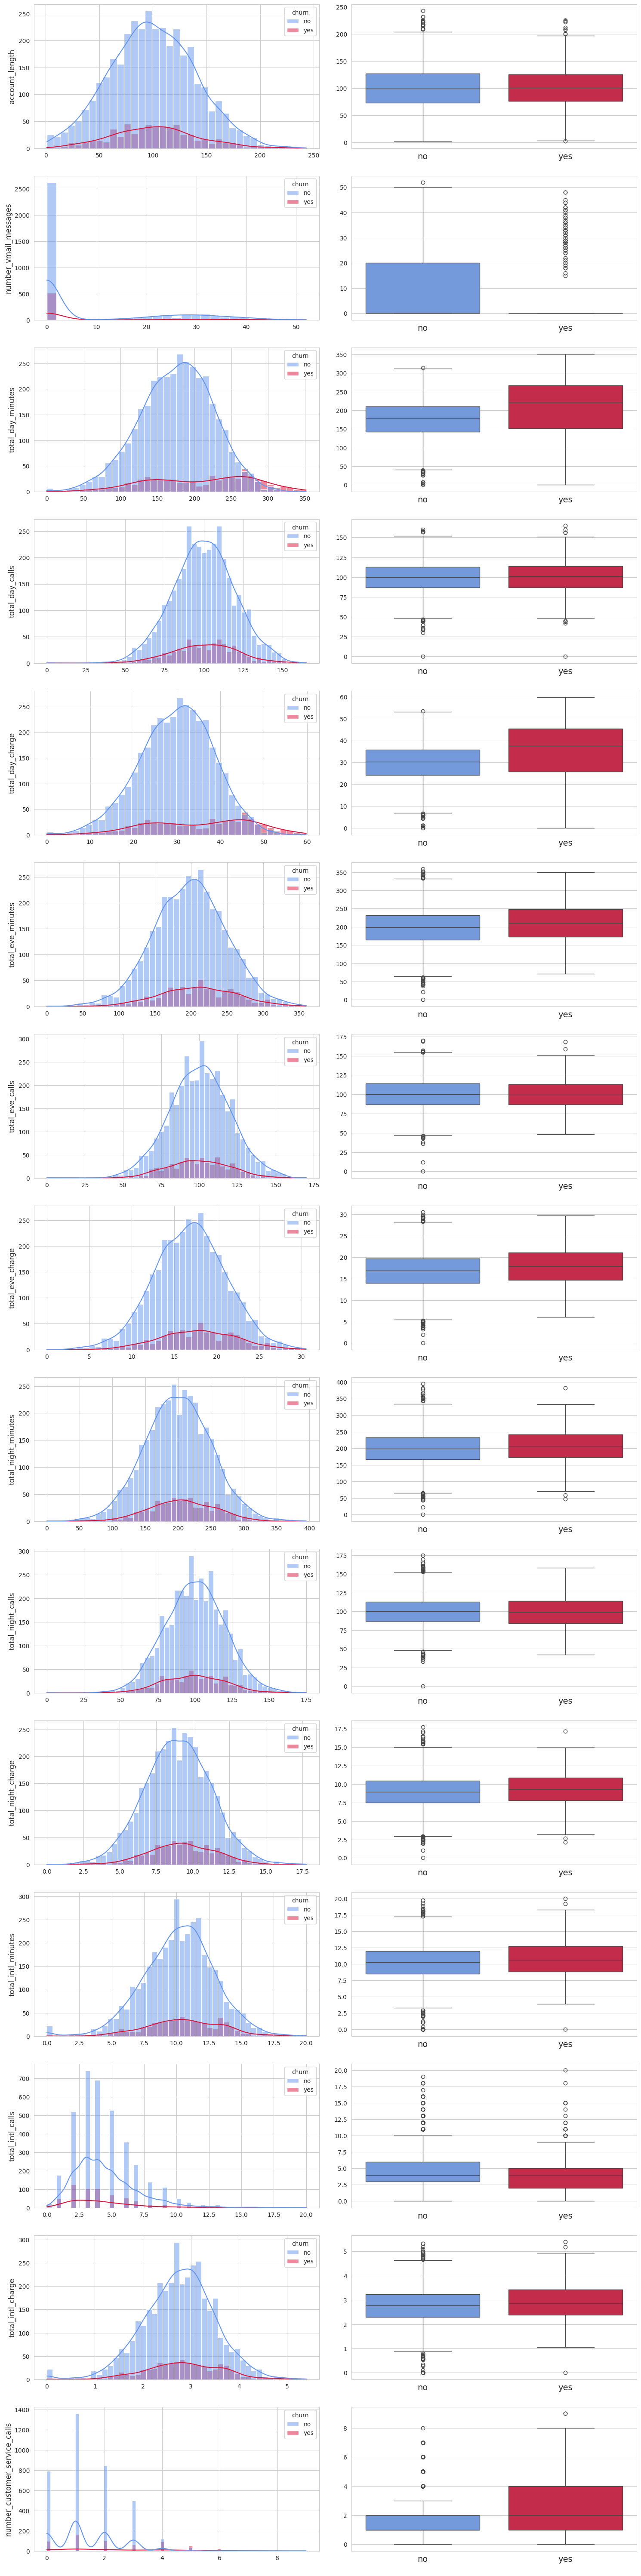

In [ ]:
fig, ax = plt.subplots(15,2,figsize=(15,60))
i=0
color_dict = {'no': matplotlib.colors.to_rgba('cornflowerblue', 0.3),
              'yes': matplotlib.colors.to_rgba('crimson', 1)}
for col in num_cols:
    sns.histplot(data=df_train, x=col, hue='churn', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=df_train, y=col, x='churn', ax=ax[i,1],
               palette=('cornflowerblue', 'crimson'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

*   Customer yang diindikasikan churn cenderung memiliki durasi panggilan yang lebih lama dan menghabiskan biaya panggilan yang lebih tinggi di siang hari
*   Customer yang diindikasikan churn cenderung lebih sering menghubungi customer service dibanding yang tidak churn

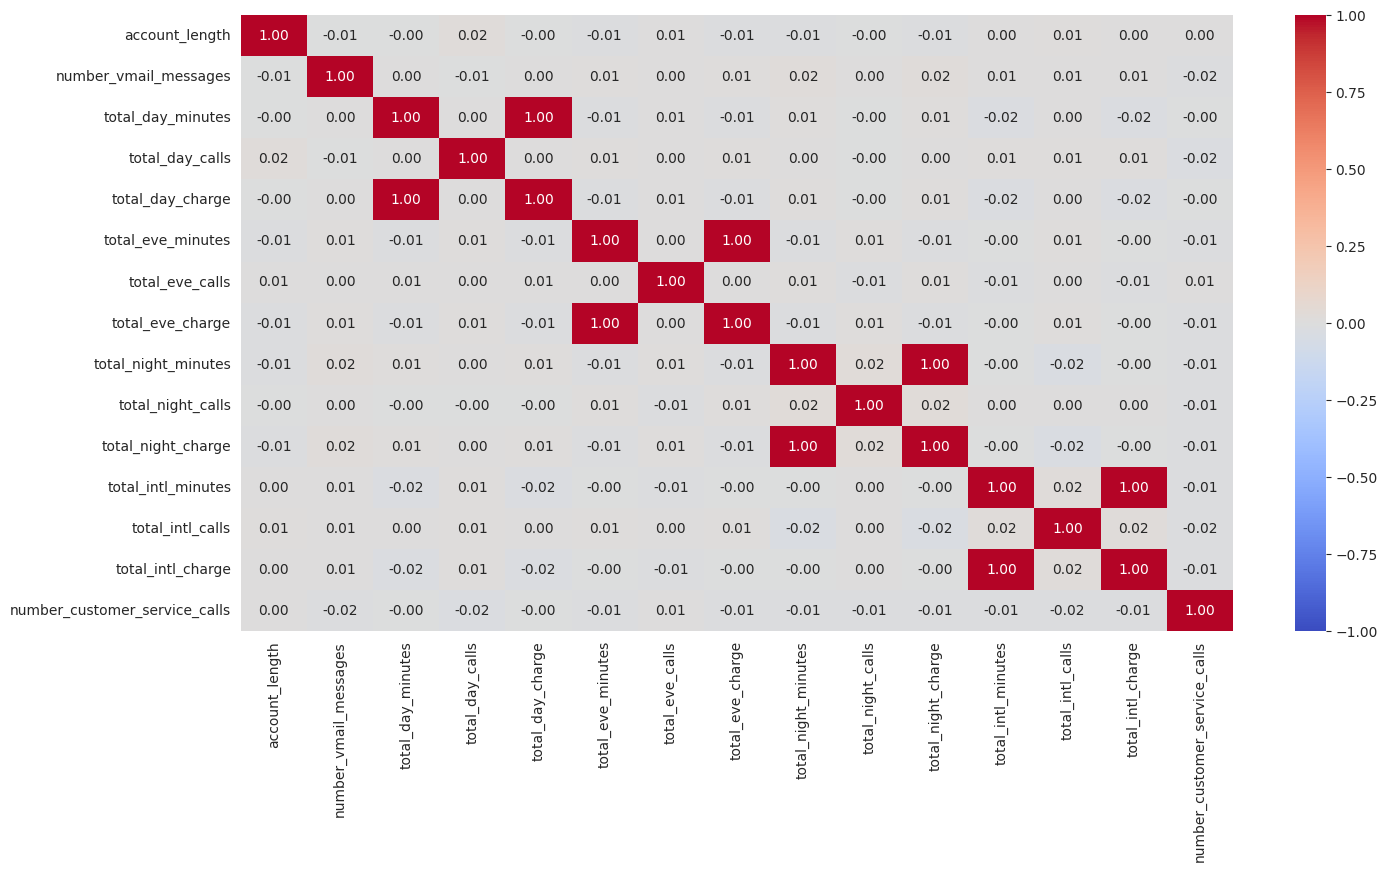

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, fmt= '.2f', vmin=-1, cmap='coolwarm');

Pada heatmap di atas hanya dilakukan pada variabel yang bertipe numerik (integer dan float). Dapat dilihat nilai korelasi pada masing-masing variabel, terdapat 4 pasang variabel yang memiliki korelasi positif yang sangat kuat yaitu:


*   Total durasi (menit) telepon internasional dengan biaya yang dikeluarkan
*   Total durasi (menit) telepon pada malam hari dengan biaya yang dikeluarkan
*   Total durasi (menit) telepon pada sore hari dengan biaya yang dikeluarkan
*   Total durasi (menit) telepon pada siang hari dengan biaya yang dikeluarkan

Korelasi positif kuat mengindikasikan bahwa pada pasangan variabel tersebut memiliki pengaruh satu sama lain. Semakin lama customer melakukan panggilan maka akan semakin besar biaya yang harus dikeluarkan.


# Data Preparation

## Cek Missing Value

**Data Training**

In [ ]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data training tidak memiliki missing value

**Data Testing**

In [ ]:
df_test.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

data testing tidak memiliki missing value

## Cek Data Duplikat

**Data Training**

In [ ]:
df_train.duplicated().sum()

0

Data tidak memiliki data duplikat, artinya setiap baris memiliki karakteristik yang unik.

**Data Testing**

In [ ]:
df_test.duplicated().sum()

0

Data testing tidak memiliki data duplikat

## Mengubah data kategori menjadi numerik

Untuk dapat dianalisis lebih lanjut data kategori diubah menjadi data numerik dengan treatment yang berbeda.

* state: class terlalu banyak dan tidak begitu berpengaruh, untuk menghindari overfitting maka state di hapus
* area_code: One-hot Encoding
* international_plan: Label Encoding
* voice_mail_plan: Label Encoding
* churn: Label Encoding

**Data Training**

In [ ]:
# menghapus kolom state
df_clean = df_train.drop('state', axis=1)

# membuat one hot encoding pada kolom area code
area_code = pd.get_dummies(df_train['area_code'], dtype=int, prefix='is')
df_clean = pd.concat([df_clean,area_code], axis=1).drop('area_code', axis=1)

# membuat label encoding pada kolom international_plan, voice_mail_plan, dan churn
label_encoding = {"no" : 0, "yes" : 1}
df_clean['international_plan'] = df_clean['international_plan'].map(label_encoding)
df_clean['voice_mail_plan'] = df_clean['voice_mail_plan'].map(label_encoding)
df_clean['churn'] = df_clean['churn'].map(label_encoding)

In [ ]:
df_clean.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,is_area_code_408,is_area_code_415,is_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,0,0,1


**Data Testing**

In [ ]:
# menghapus kolom state
df_clean_test = df_test.drop('state', axis=1)

# membuat one hot encoding pada kolom area code
area_code = pd.get_dummies(df_test['area_code'], dtype=int, prefix='is')
df_clean_test = pd.concat([df_clean_test,area_code], axis=1).drop('area_code', axis=1)

# membuat label encoding pada kolom international_plan, voice_mail_plan, dan churn
label_encoding = {"no" : 0, "yes" : 1}
df_clean_test['international_plan'] = df_clean_test['international_plan'].map(label_encoding)
df_clean_test['voice_mail_plan'] = df_clean_test['voice_mail_plan'].map(label_encoding)

In [ ]:
df_clean_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_area_code_408,is_area_code_415,is_area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1,0
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0,1
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0,1,0


## Deteksi dan treatment outlier

Dalam analisis outlier kita hanya menggunakan data numerik pada data training

In [ ]:
numeric_column = df_train.select_dtypes(include='number').columns

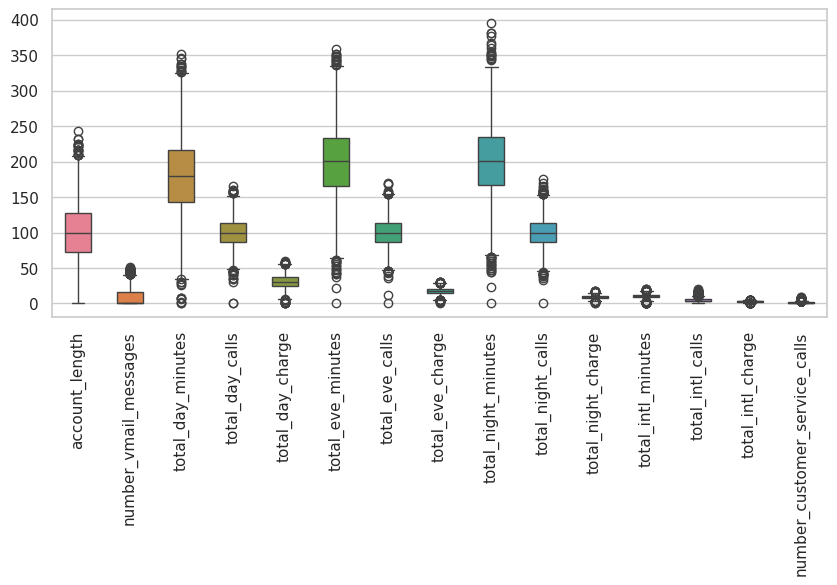

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(df_clean[numeric_column], width=0.5)
plt.xticks(rotation=90);

Pada boxplot diatas dapat dilihat bahwa semua variabel numerik memiliki nilai outlier. Outlier akan sangat berdampak ketika akan membuat modeling. Ada dua treatment yang bisa dilakukan, membuang outlier atau menggantikan outlier dengan nilai upper bound/ lower bound.
Karena data yang digunakan imbalance, dan kemungkinan besar akan lebih banyak data yang terbuang, maka pada analisis ini kami akan mempertahankannya dengan mengganti menjadi nilai upper bound / lower bound.

**Mengganti nilai outlier dengan upper bound dan lower bound**

In [ ]:
def replace_outliers(df,columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[col] = df[col].mask(df[col]< lower_bound, lower_bound,axis=0) #df[col].median()
        df[col] = df[col].mask(df[col]> upper_bound, upper_bound,axis=0)

    return df

In [ ]:
df_clean = replace_outliers(df_clean, numeric_column)

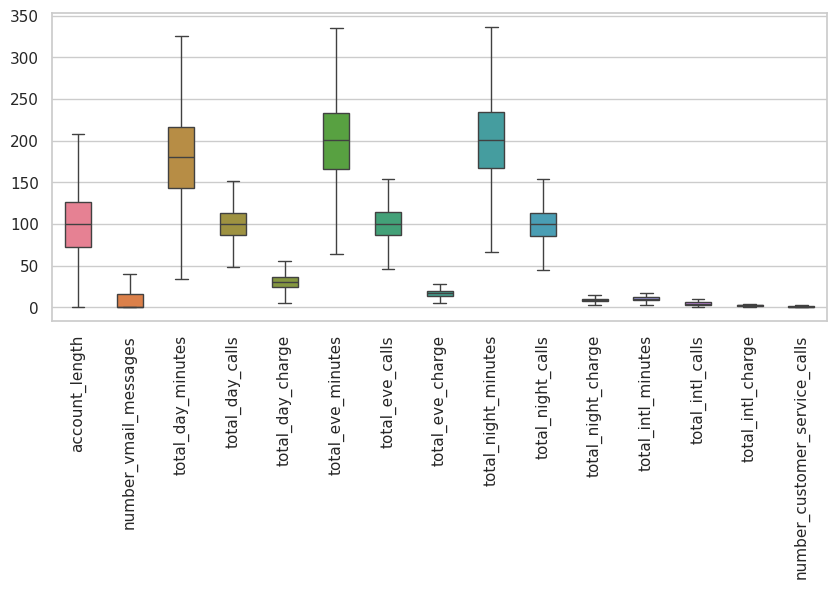

In [ ]:
# cek outlier dengan boxplot
plt.figure(figsize=(10,4))
sns.boxplot(df_clean[numeric_column], width=0.5)
plt.xticks(rotation=90);

## Handling Imbalance Dataset

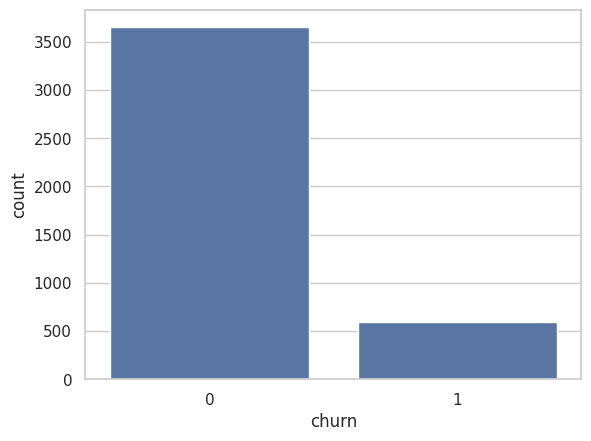

In [ ]:
sns.countplot(x = 'churn', data = df_clean);

In [ ]:
# Train Test Split
X = df_clean.drop('churn',axis=1)
y = df_clean['churn']
# Membagi data train menjadi data train dan data validasi
X_train, X_val , y_train, y_val = train_test_split(X, y , test_size=0.3, random_state=101)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_smote==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_smote==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


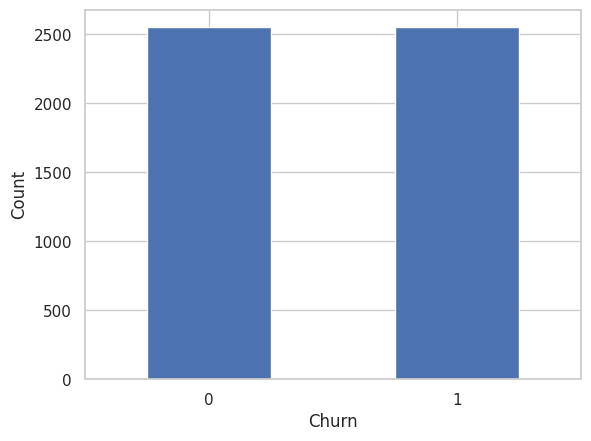

In [ ]:
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count');

## Transformasi data menggunakan MinMax

**Data Training**

In [ ]:
# X_train
scaler = MinMaxScaler()
X_train_transform = scaler.fit_transform(X_train_smote)
X_train_transform = pd.DataFrame(X_train_transform, columns=X_train.columns)

In [ ]:
# X_val
scaler = MinMaxScaler()
X_val_transform = scaler.fit_transform(X_val)
X_val_transform = pd.DataFrame(X_val_transform, columns=X_val.columns)

In [ ]:
X_train_transform.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_area_code_408,is_area_code_415,is_area_code_510
0,0.449275,0.0,0.0,0.000,0.552616,0.548077,0.552735,0.767318,0.495370,0.767346,0.284133,0.523148,0.284259,0.589286,1.000000,0.590426,0.285714,0.0,1.0,0.0
1,0.599034,0.0,0.0,0.000,0.317967,0.576923,0.317975,0.522660,0.402778,0.522767,0.673536,0.634259,0.673560,0.717857,0.666667,0.718085,0.285714,1.0,0.0,0.0
2,0.473430,0.0,1.0,0.525,0.501501,0.471154,0.501463,0.381540,0.004630,0.381396,0.507920,0.356481,0.508128,0.810714,0.476190,0.811170,0.571429,1.0,0.0,0.0
3,0.816425,0.0,0.0,0.000,0.728602,0.567308,0.728755,0.604090,0.717593,0.604293,0.371943,0.458333,0.372325,0.417857,0.761905,0.417553,0.000000,0.0,1.0,0.0
4,0.299517,0.0,0.0,0.000,0.502530,0.750000,0.502675,0.611091,0.476852,0.611232,0.616849,0.254630,0.616770,0.525000,0.285714,0.523936,0.000000,0.0,1.0,0.0


In [ ]:
X_val_transform.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_area_code_408,is_area_code_415,is_area_code_510
0,0.507246,0.0,0.0,0.0,0.390695,0.471154,0.390644,0.534819,0.486111,0.534909,0.356011,0.319444,0.355864,0.396429,0.476190,0.396277,0.571429,0.0,1.0,0.0
1,0.323671,0.0,0.0,0.0,0.375943,0.307692,0.375908,0.258475,0.171296,0.258673,0.554233,0.356481,0.554218,0.875000,0.476190,0.877660,0.571429,0.0,0.0,1.0
2,0.574879,0.0,0.0,0.0,0.206818,0.471154,0.206752,0.432388,0.412037,0.432567,0.409365,0.958333,0.409362,0.453571,0.380952,0.452128,0.285714,0.0,1.0,0.0
3,0.676329,0.0,0.0,0.0,0.318654,0.480769,0.318581,0.426861,0.143519,0.426930,0.277093,0.763889,0.277675,0.339286,0.190476,0.337766,0.285714,0.0,1.0,0.0
4,0.657005,0.0,1.0,1.0,0.523113,0.442308,0.523264,0.419492,0.550926,0.419558,0.554233,0.504630,0.554218,0.632143,0.380952,0.632979,0.571429,0.0,0.0,1.0


**Data Testing**

In [ ]:
df_test_transform = scaler.fit_transform(df_clean_test)
df_test_transform = pd.DataFrame(df_test_transform, columns=df_clean_test.columns)

In [ ]:
df_test_transform.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_area_code_408,is_area_code_415,is_area_code_510
0,0.535865,0.0,1.0,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0.0,1.0,0.0
1,0.493671,1.0,0.0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,0.0,0.0,1.0
2,0.257384,0.0,0.0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0.0,1.0,0.0
3,0.388186,0.0,0.0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0.0,0.0,1.0
4,0.729958,0.0,0.0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0.0,1.0,0.0


# Modeling

## Regresi Logistik

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train_transform, y_train_smote)

LogisticRegression()

In [ ]:
log_predict = logmodel.predict(X_val_transform)

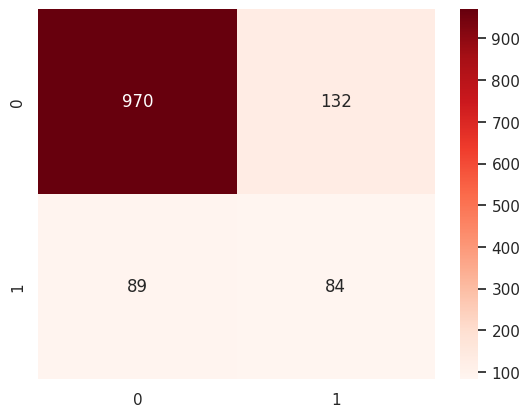

In [ ]:
sns.heatmap(confusion_matrix(y_val, log_predict), annot=True, fmt='', cmap='Reds');

In [ ]:
acc = round(accuracy_score(y_val , log_predict) , 3)
prec = round(precision_score(y_val, log_predict),3)
rec = round(recall_score(y_val, log_predict),3)
f1 = round(f1_score(y_val, log_predict),3)

model_names =['Regresi Logistik']
result_log = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)
result_log

,Accuracy,Precision,Recall,f1
Regresi Logistik,0.827,0.389,0.486,0.432


Secara general, akurasi model regresi logistik sudah cukup baik yaitu 83%. Namun, nilai recall cukup rendah yaitu hanya 49%.

## K Neighbors Classifier (KNN)

**membuat simulasi error rate untuk mencari nilai k optimal**

In [ ]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_transform, y_train_smote)
    pred_i = knn.predict(X_val_transform)
    error_rate.append(np.mean(pred_i != y_val))

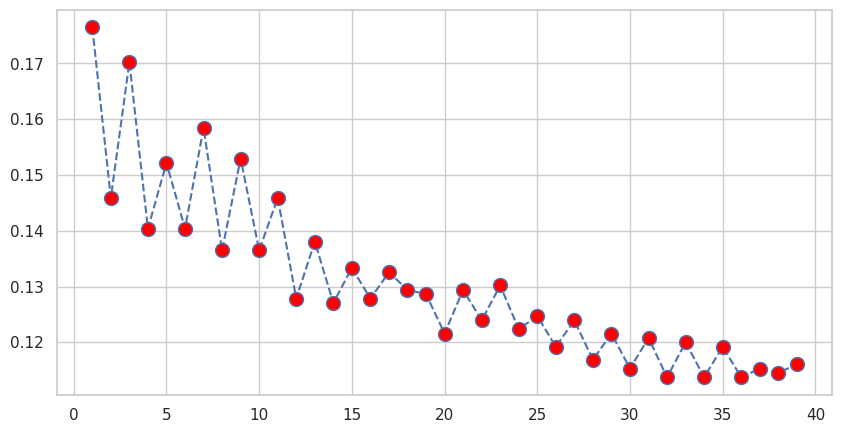

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10);

dari simulasi didapatkan nilai k=36 dengan error rate paling rendah

In [ ]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train_transform, y_train_smote)
knn_predict = knn.predict(X_val_transform)

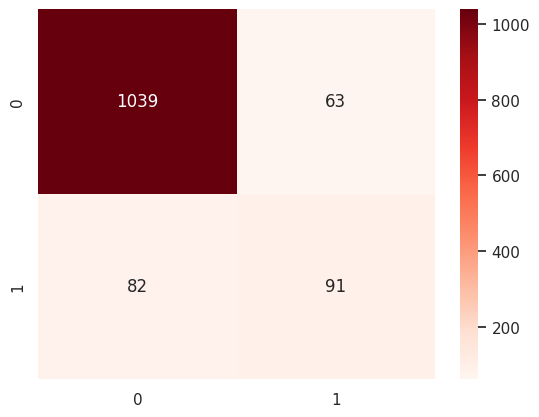

In [ ]:
sns.heatmap(confusion_matrix(y_val, knn_predict), annot=True, fmt='', cmap='Reds');

In [ ]:
acc = round(accuracy_score(y_val , knn_predict) , 3)
prec = round(precision_score(y_val, knn_predict),3)
rec = round(recall_score(y_val, knn_predict),3)
f1 = round(f1_score(y_val, knn_predict),3)

model_names =['KNN']
result_knn = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)
result_knn

,Accuracy,Precision,Recall,f1
KNN,0.886,0.591,0.526,0.557


Secara general, akurasi model knn sudah cukup baik yaitu 89% dan nilai recall 52%.

## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_transform, y_train_smote)
dtc_predict = dtc.predict(X_val_transform)

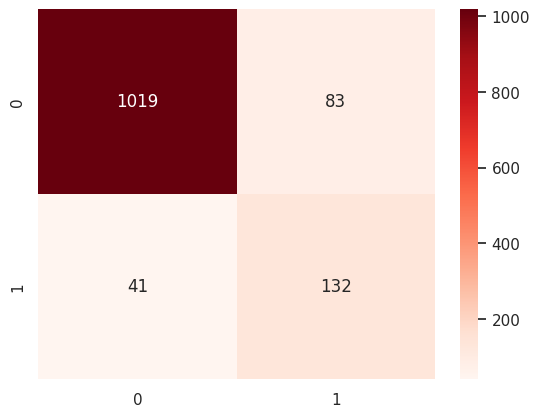

In [ ]:
sns.heatmap(confusion_matrix(y_val, dtc_predict), annot=True, fmt='', cmap='Reds');

In [ ]:
acc = round(accuracy_score(y_val , dtc_predict) , 3)
prec = round(precision_score(y_val, dtc_predict),3)
rec = round(recall_score(y_val, dtc_predict),3)
f1 = round(f1_score(y_val, dtc_predict),3)

model_names =['Decision Tree']
result_dtc = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)
result_dtc

,Accuracy,Precision,Recall,f1
Decision Tree,0.903,0.614,0.763,0.68


Secara general, akurasi model decision tree sudah cukup baik yaitu 90%, begitu juga dengan nilai recall mencapai 76%.

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_transform, y_train_smote)
rf_predict = rf.predict(X_val_transform)

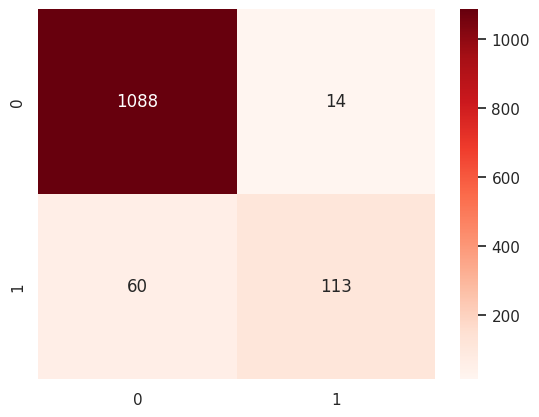

In [ ]:
sns.heatmap(confusion_matrix(y_val, rf_predict), annot=True, fmt='', cmap='Reds');

In [ ]:
acc = round(accuracy_score(y_val , rf_predict) , 3)
prec = round(precision_score(y_val, rf_predict),3)
rec = round(recall_score(y_val, rf_predict),3)
f1 = round(f1_score(y_val, rf_predict),3)

model_names =['Random Forest']
result_rf = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)
result_rf

,Accuracy,Precision,Recall,f1
Random Forest,0.942,0.89,0.653,0.753


Secara general, akurasi model random forest sudah sangat baik yaitu 94% dan nilai recall 65%.

# Evaluation

In [ ]:
result_compare= pd.concat([result_log,result_knn,result_dtc,result_rf],axis=0)
result_compare

,Accuracy,Precision,Recall,f1
Regresi Logistik,0.827,0.389,0.486,0.432
KNN,0.886,0.591,0.526,0.557
Decision Tree,0.903,0.614,0.763,0.680
Random Forest,0.942,0.890,0.653,0.753


Berdasarkan hasil evaluasi berbagai model, model yang memiliki ketepatan prediksi terbaik adalah model Random Forest. Sehingga model random forest dipilih untuk melakukan prediksi pada data test.

# Melakukan prediksi pada data testing

In [ ]:
# data test yang sudah di transformasi sebelumnya
df_test_transform.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_area_code_408,is_area_code_415,is_area_code_510
0,0.535865,0.0,1.0,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0.0,1.0,0.0
1,0.493671,1.0,0.0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,0.0,0.0,1.0
2,0.257384,0.0,0.0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0.0,1.0,0.0
3,0.388186,0.0,0.0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0.0,0.0,1.0
4,0.729958,0.0,0.0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0.0,1.0,0.0


In [ ]:
predict = pd.Series(rf.predict(df_test_transform))

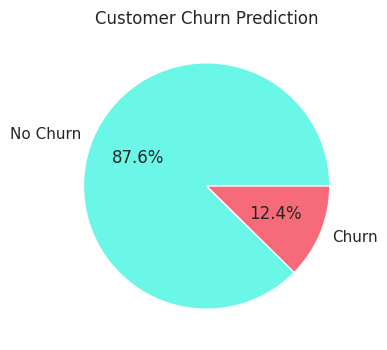

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(predict.value_counts(), labels=(['No Churn','Churn']), autopct='%1.1f%%', colors=['#6af7e8', '#f76a79'])
plt.title('Customer Churn Prediction')
plt.show()

Dari sampel data test, diprediksi bahwa akan ada 12.4% customer yang akan pindah ke provider lain(churn), sedangkan sisanya 87,6% masih menjadi pelanggan setia provider.